In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

# **1. Workflow Goals** #
**1. Classifing.** Categorize our samples to either if they survived or not. <br>
**2. Correlating.** Determine which features contribute significantly in surviving.

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combined_dataset = [train_df,test_df]
print(train_df.shape)
print(test_df.shape)
train_df.head()

(891, 12)
(418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **2. Dataset overview** #
The dataset contains information about titanic wrecking passengers, and consists of two files 'train.csv' which contains the training data consisting of 11 main features and target variable that shows if the passengers survived or not while the test data contains only the 11 main features. <br>
#### **The following table shows the features collected about the passengers with it's description** ####
|| Attributes | Description |
| ---| --- | --- |
|1|PassengerId | ID of ship boarding
|2|Survived | States if the passenger survived the wrick or not (0/1)
|3|Pclass | Ticket class 
|4|Name | Name of the passenger
|5|Sex | Sex/Gender
|6|Age | Age of passenger
|7|SibSp | Number of siblings of the passenger on the board of the Titanic
|8|Parch | Number of parents / children on the board of the the Titanic
|9|Ticket | Ticket Number
|10|Fare | Passenger fare that he paid to get on the board of the the Titanic
|11|Cabin | Cabin where the passenger where staying in
|12|Embarked| Port of Embarkation (C : Cherbourg, Q : Queenstown, S : Southampton)

# **3. Exploratory Data Analysis** #

## ***3.1. Determine Categorical and Numerical Variables.*** ##

In [4]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

**Which Attributes are Categorical?** <br>
**Categorical attributes:** Survived, Sex , Embarked. <br>
**Ordinal attributes:** Pclass.

**Which Attributes are Numerical?** <br>
**Continous attributes:** Age, Fare. <br>
**Discrete attributes:** SibSp, Parch.

## ***3.2. Determine If there are null or missing values.*** ##

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**Which features contain blank, null or empty values?** <br>
**1.train_df:** Age, Cabin, Embarked <br>
**2. test_df:** Age, Fare, Cabin

## ***3.3. Determine data types of the attributes.*** ##

In [7]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**1. There are Seven(Six in case of test set) attributes either float or int.**      
**2. There are Five attributes are strings (objects).**   

## ***3.4. Determine if there are duplicates in the attributes.*** ##

All Attributes can have duplicates except for **PassengerId** and **Ticket**.

In [8]:
for col in ['PassengerId','Ticket']:  
    print(f'The Duplicates in {col} column equals {train_df[col].duplicated().sum()}.')

The Duplicates in PassengerId column equals 0.
The Duplicates in Ticket column equals 210.


## ***3.5. Determine Statistical properties of the attributes.*** ##

In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**What is the Statistical findings of Numerical Attributes?** <br>
1. Only 38.38 % of passengers in train set survived which is good representitve of the actual survival rate of 32%.
2. More than 75% of the passengers' ages where equal or below 38 years.
3. More than 75 of the passengers had only 1 or no siblings or spouse on the board of titanic.
4. More than 75% of the passengers had no parents or childrens on the board of titanic.
5. More than 75% of the passengers paid 31$ or less for the tickets.

In [10]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**What is the Statistical findings of Categorical Attributes?** <br>
1. Most of the Passengers were Males (around 64.75%).
2. Most of the Passengers embarked to the ship from Southampton port (around 72.44%).

## ***3.6. Correlation between attributes and target.*** ##

**To Decide which attributes affect the target the most we have to study the correlation of features with the target which we will make on several steps:**
1. Pivoting some of our categorical features with target.
2. correlating some of our numerical features with target.

#### ***3.6.1. Pivoting Categorical features with target.*** ####

In [11]:
train_df[['Sex','Survived']].groupby('Sex',as_index=False).mean().sort_values(by='Survived',ascending=False).reset_index(drop=True)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
train_df[['Pclass','Survived']].groupby('Pclass',as_index=False).mean().sort_values(by='Survived',ascending=False).reset_index(drop=True)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
train_df[['SibSp','Survived']].groupby('SibSp',as_index=False).mean().sort_values(by='Survived',ascending=False).reset_index(drop=True)

,SibSp,Survived
0,1,0.535885
1,2,0.464286
2,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
train_df[['Parch','Survived']].groupby('Parch',as_index=False).mean().sort_values(by='Survived',ascending=False).reset_index(drop=True)

,Parch,Survived
0,3,0.600000
1,1,0.550847
2,2,0.500000
3,0,0.343658
4,5,0.200000
5,4,0.000000
6,6,0.000000


**Findings:** <br>
1. Around 75% of passengers who survived were Females indicating that Gender is highly correlated to either the passenger survived or not.
2. As Class of the passenger increases the survival rate increases indicating that Pclass is highly correlated to either the passenger survived or not.
3. For Parch and SibSp There is a trend that as their number decrease the survival rate increases but for certain values there is zero correlation which suggest that we could derive a new features for the overall number of relatives on board.

#### ***3.6.2. Correlation of Numerical features with target.*** ####

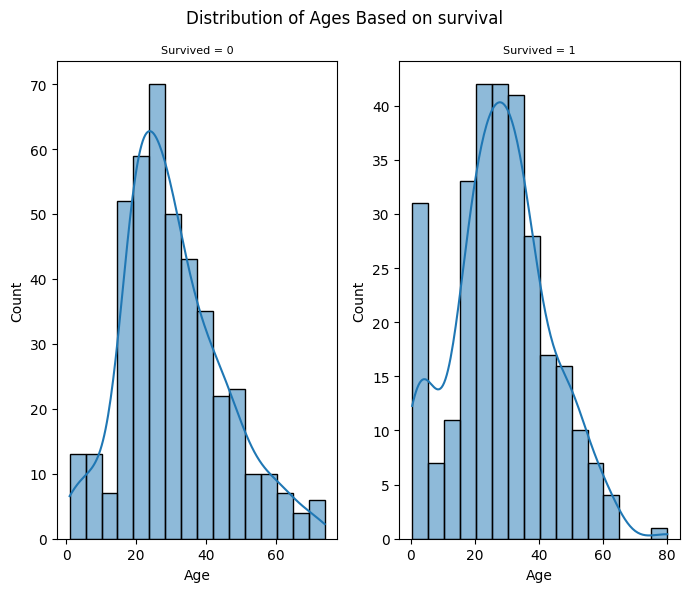

In [15]:
fig , ax = plt.subplots(1,2,figsize=(7,6))
sns.histplot(train_df.loc[train_df['Survived'] == 0,'Age'],ax=ax[0],kde=True)
sns.histplot(train_df.loc[train_df['Survived'] == 1,'Age'],ax=ax[1],kde=True)
ax[0].set_title('Survived = 0',fontsize=8)
ax[1].set_title('Survived = 1',fontsize=8)
fig.suptitle('Distribution of Ages Based on survival')
plt.tight_layout()
plt.show()

**Findings:** <br>
1. Survival Rate of The Children and Babies is relatively high.
2. The Age Period from 20 Years to 40 Years have high survival rate relatively to others.

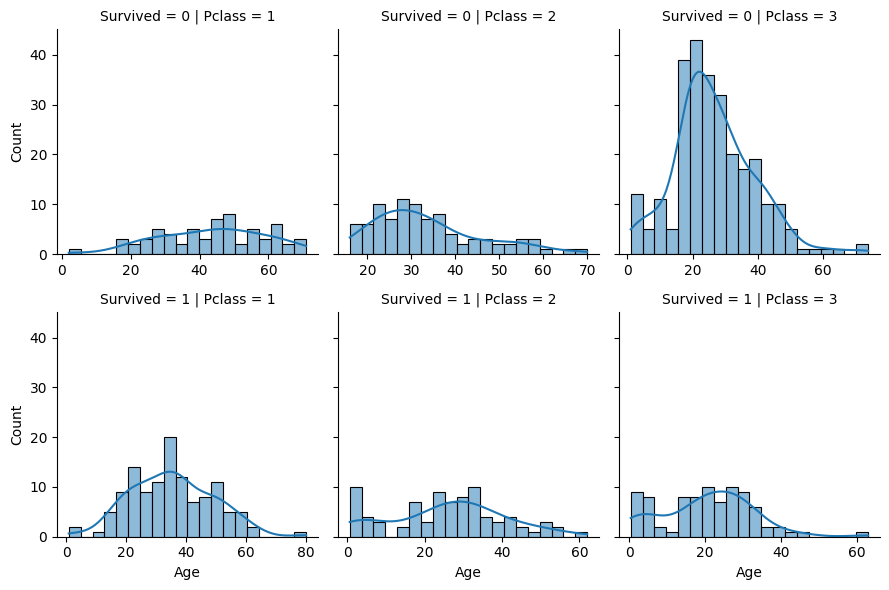

In [16]:
g = sns.FacetGrid(data=train_df,col='Pclass',row='Survived',sharex=False)
g.map(sns.histplot,'Age',kde=True,bins=20)
plt.show()

**Findings:** <br>
1. Survival Rate of The Children and Babies is relatively high Regardless Class of their tickets which supports that rescue process took age as a important factor.
2. The Survival Rate of the Pclass 1 is relatively high which supports that rescue took Class of ticket in consideration when deciding who gets into emergency boats.

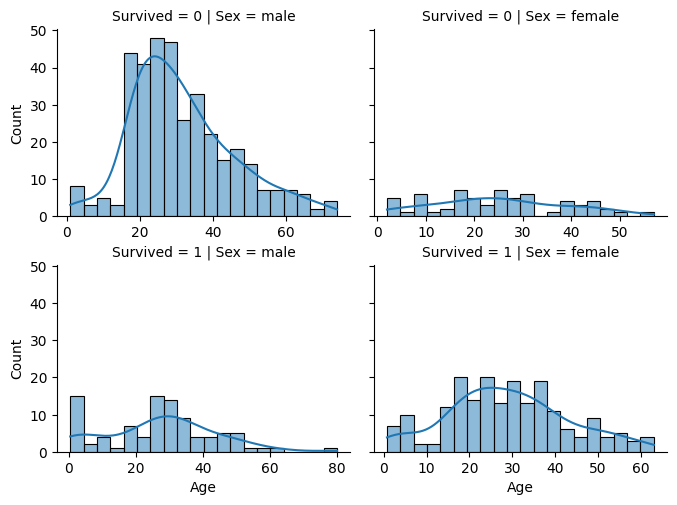

In [17]:
g = sns.FacetGrid(data=train_df,col='Sex',row='Survived',sharex=False)
g.map(sns.histplot,'Age',kde=True,bins=20)
g.fig.set_size_inches(7,5)
plt.show()

**Findings:** <br>
1. Survival Rate of The Females in different ages is relatively higher than males which indicates that gender was a major factor to decide either the passenger will get into emergency boat or not .

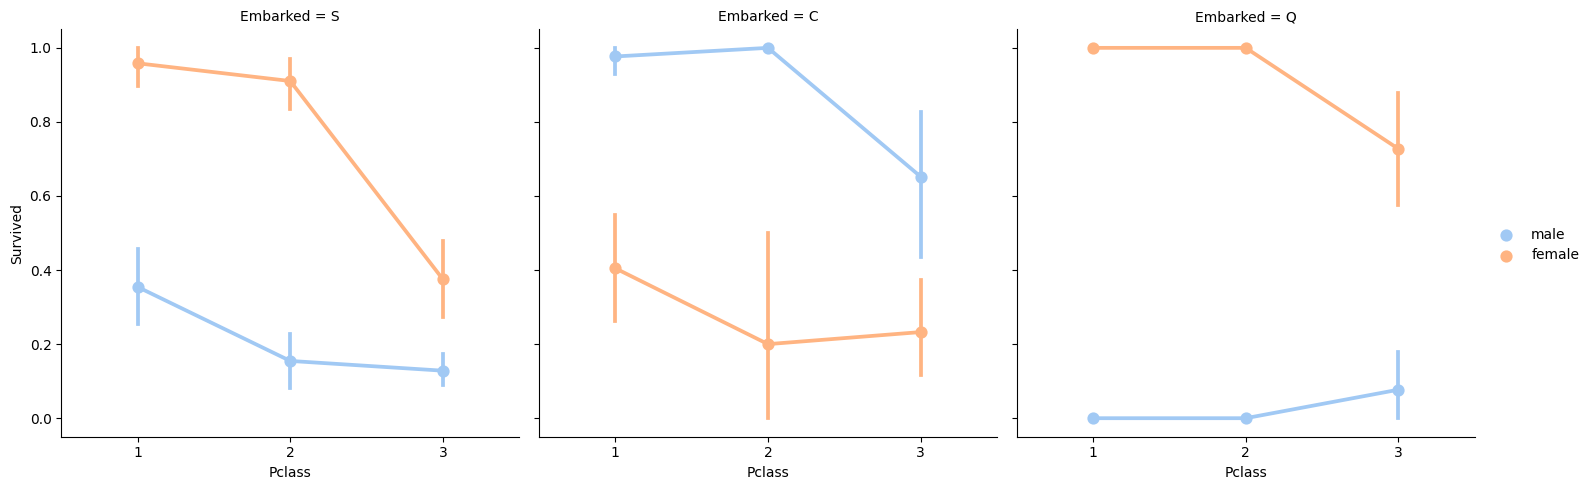

In [18]:
g = sns.FacetGrid(data=train_df,col='Embarked',sharex=False,height=5)
g.map(sns.pointplot,'Pclass','Survived','Sex',palette='pastel')
g.add_legend()
plt.show()

**Findings:** <br>
1. Female Passengers have high survival rate except for Passenger who embarked from Cherbourg port (C).
2. Ports of Embarkation have variation with survival rate.

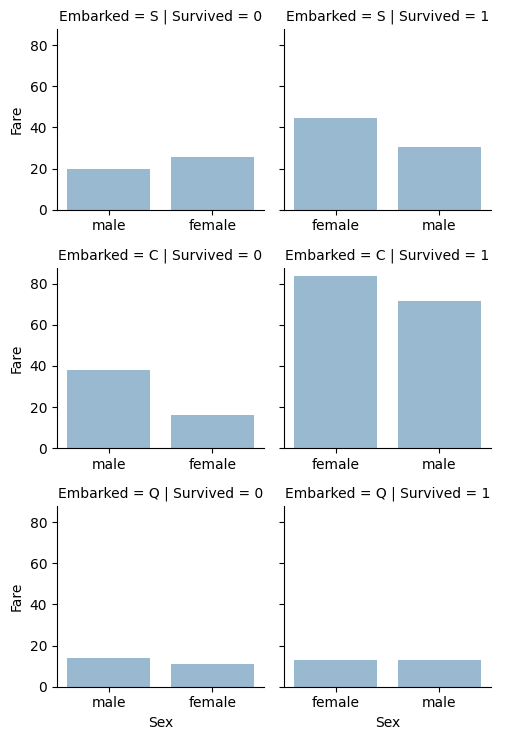

In [19]:
g = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.5,sharex=False)
g.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
g.add_legend()
plt.tight_layout()
plt.show()

**Findings:** <br>
1. The higher the Fare Passengers have paid the higher their survival rate.
2. Ports of Embarkation have variation with survival rate.

# **4. Data Wrangling (Pre-processing)** #

In [20]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### ***4.1. Dropping unimportant columns.*** ####

In [21]:
print(f'Shape of train_df before dropping is {combined_dataset[0].shape}')
print(f'Shape of test_df before dropping is {combined_dataset[1].shape}')

for dataset in combined_dataset:
    dataset.drop(columns=['PassengerId','Cabin','Ticket'],axis=1,inplace=True)
    
print(f'Shape of train_df after dropping is {combined_dataset[0].shape}')
print(f'Shape of test_df after dropping is {combined_dataset[1].shape}')

Shape of train_df before dropping is (891, 12)
Shape of test_df before dropping is (418, 11)
Shape of train_df after dropping is (891, 9)
Shape of test_df after dropping is (418, 8)


In [22]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


#### ***4.2. Filling Na Values.*** ####

Train_df has a Na values in **Age** and **Embarked** columns. <br>
Test_df  has a Na values in **Age** and **Fare** columns.

##### ***4.2.1. Filling Na Values of Age column.*** #####
We'll fill age values with the value of mean age depending on Pclass and Sex.

In [23]:
for dataset in combined_dataset:
    median_ages = pd.DataFrame(dataset.groupby(["Sex", "Pclass"])["Age"].median().round(0))
    for i in ['male', 'female']:
        for j in range(0, 3):
            median_age = median_ages.loc[(i, j + 1)][0]
            dataset.loc[(dataset['Sex'] == i) & (dataset['Pclass'] == j + 1), 'Age'] = dataset.loc[(dataset['Sex'] == i) & (dataset['Pclass'] == j + 1), 'Age'].fillna(median_age)

##### ***4.2.2. Filling Na Values of Embarked column in train_df.*** #####
We'll fill age values with the value of mode values of the column.

In [24]:
embarked_freq = train_df['Embarked'].dropna().mode()[0]
train_df['Embarked'] = train_df['Embarked'].fillna(embarked_freq)
train_df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

##### ***4.2.3. Filling Na Values of Fare column in test_df.*** #####
We'll fill age values with the value of mean values of the column depending on Pclass.

In [25]:
mean_fares = pd.DataFrame(test_df.groupby(['Pclass'], as_index=True)['Fare'].mean())
for i in range(1, 4):
    mean_fare = mean_fares.loc[i, 'Fare']
    test_df.loc[test_df['Pclass'] == i, 'Fare'] = test_df.loc[test_df['Pclass'] == i, 'Fare'].fillna(mean_fare)
test_df.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### ***4.5. Features' engineering.*** ####

##### ***4.5.1. Transforming Age column to Age Band*** #####

In [26]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.336714
2,"(32.252, 48.168]",0.412844
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [27]:
for dataset in combined_dataset:
    dataset.loc[dataset['Age'] <= 16.336 , 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16.336) & (dataset['Age'] <= 32.252) , 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32.252) & (dataset['Age'] <= 48.168) , 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48.168) & (dataset['Age'] <= 64.084) , 'Age'] = 3
    dataset.loc[(dataset['Age'] > 64.084) & (dataset['Age'] <= 80.0) , 'Age'] = 4
    dataset['Age'] = dataset['Age'].astype(int)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand
0,0,3,"Braund, Mr. Owen Harris",male,1,1,0,7.2500,S,"(16.336, 32.252]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,71.2833,C,"(32.252, 48.168]"
2,1,3,"Heikkinen, Miss. Laina",female,1,0,0,7.9250,S,"(16.336, 32.252]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,53.1000,S,"(32.252, 48.168]"
4,0,3,"Allen, Mr. William Henry",male,2,0,0,8.0500,S,"(32.252, 48.168]"


In [28]:
train_df['FareBand'] = pd.qcut(train_df['Fare'],4)
train_df[['FareBand','Survived']].groupby(['FareBand'],as_index = False).mean().sort_values(by='Survived',ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [29]:
for dataset in combined_dataset:
    dataset.loc[(dataset['Fare'] <= 7.91),'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454),'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31.0),'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 31.0) & (dataset['Fare'] <= 512.329),'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
test_df.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,2,0,0,0,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,2,1,0,0,S


In [30]:
for dataset in combined_dataset:
    dataset['Title'] = dataset['Name'].str.extract(r'([A-Za-z]+)\.')

In [31]:
for dataset in combined_dataset:
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

In [32]:
train_df[['Title','Survived']].groupby(['Title'],as_index=False).mean().sort_values(by='Title',ascending=False)

,Title,Survived
4,Rare,0.347826
3,Mrs,0.793651
2,Mr,0.156673
1,Miss,0.702703
0,Master,0.575000


**Findings:** <br>
1. Female passenger have high survival rate regardless being married or not which support our previous finding that the female had the priority to get into the emergency boats.
2. While The survival rate of male is very low unless he has a certain title for example master, doctor, etc....

In [33]:
for dataset in combined_dataset:
    dataset['Family_onboard'] = dataset['SibSp'] + dataset['Parch']
train_df[['Family_onboard','Survived']].groupby(['Family_onboard'],as_index=False).mean().sort_values(by='Survived',ascending=False).reset_index(drop=True)

,Family_onboard,Survived
0,3,0.724138
1,2,0.578431
2,1,0.552795
3,6,0.333333
4,0,0.303538
5,4,0.200000
6,5,0.136364
7,7,0.000000
8,10,0.000000


**Findings:** <br>
1. Family members have a little influence on survival rate as the survival doesn't correlate with numbers of family members onboard we can see that the passengers who had 3 members had a very high survival rate even more who was alone which doesn't comply with our intial thoughts **so we may need to adress this feature with another attribute states if the passenger was alone or not regardless the numbe of family members he/she had on board**.

In [34]:
for dataset in combined_dataset:
    dataset['Alone'] = 0
    dataset.loc[dataset['Family_onboard'] == 0, 'Alone'] = 1
train_df[['Alone','Survived']].groupby(['Alone'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Alone,Survived
0,0,0.505650
1,1,0.303538


In [35]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'AgeBand', 'FareBand', 'Title', 'Family_onboard', 'Alone'],
      dtype='object')

**Now we should drop the unimportant features**

In [36]:
train_df.drop(['Name','SibSp','Parch','AgeBand','FareBand','Family_onboard'],axis=1,inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,0,3,male,1,0,S,Mr,0
1,1,1,female,2,3,C,Mrs,0
2,1,3,female,1,1,S,Miss,1
3,1,1,female,2,3,S,Mrs,0
4,0,3,male,2,1,S,Mr,1


In [37]:
test_df.drop(['Name','SibSp','Parch','Family_onboard'],axis=1,inplace=True)
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,3,male,2,0,Q,Mr,1
1,3,female,2,0,S,Mrs,0
2,2,male,3,1,Q,Mr,1
3,3,male,1,1,S,Mr,1
4,3,female,1,1,S,Mrs,0


#### ***4.4. Encoding Categorical Values.*** ####

##### ***4.4.1. Encoding Sex and Embarked Columns.*** #####

In [38]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for dataset in combined_dataset:
    for i in ['Sex','Embarked','Title']:
        dataset[i] = LE.fit_transform(dataset[i])
        print(LE.classes_)

['female' 'male']
['C' 'Q' 'S']
['Master' 'Miss' 'Mr' 'Mrs' 'Rare']
['female' 'male']
['C' 'Q' 'S']
['Master' 'Miss' 'Mr' 'Mrs' 'Rare']


In [39]:
train_df.head(1)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,0,3,1,1,0,2,2,0


For **Sex** column : female --> 0 , male --> 1 <br>
For **Embarked** column : C --> 0 , Q --> 1 , S --> 2 <br>
For **Title** column : Master --> 0 , Miss --> 1 , Mr --> 2 , Mrs --> 3, Rare --> 4

# **5. Modelling, Predicting and Solving** #

In [40]:
print(train_df.shape)
print(train_df.columns)

(891, 8)
Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title',
       'Alone'],
      dtype='object')


In [41]:
print(test_df.shape)
print(test_df.columns)

(418, 7)
Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'Alone'], dtype='object')


Finally, after wrangling processes we end up with a **training data** of **891 rows and 8 columns** (including target variable) and with **testing data** of **418 rows and 7 columns** (with no target variable).

Selecting The Suitable algorithm to work with must be based on some criteria such as: <br>
**1. Accuracy.** <br>
**2. Interpretability.** <br>
**3. Complexity.** <br>
**4. Scalability.** <br>
**5. Data Type.** <br>
Based on The Data types of our features which are all a categorical variables Those algorithms should be a good fit: <br>
**1. Naive Bayes.** <br>
**2. Decision Tree.** <br>
**3. Random Forest.** <br>
**4. K-Nearest Neighbors.** <br>
and also I will consider two other algorithms to test which are: <br>
**1. Logistic Regression.** <br>
**2. Support Vector Machine Classifier.** <br>


But **First**, I will split the target variable from features in the training set.

In [42]:
X = train_df.drop(['Survived'],axis=1)
y = train_df['Survived']
print(X.shape)
print(y.shape)

(891, 7)
(891,)


**Then**, I split The training Data into **two** splits for **training** and **validation**. 

In [43]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,stratify=y,random_state=24)
print('X_train size:',X_train.shape)
print('y_train size:',y_train.shape)
print('X_test size:',X_test.shape)
print('y_test size:',y_test.shape)

X_train size: (712, 7)
y_train size: (712,)
X_test size: (179, 7)
y_test size: (179,)


In [45]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,precision_recall_curve
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix

In [46]:
def Evaluation_Metrices(y_t,y_p,train_test):
    print(f'{train_test} Set Accuracy equals:',accuracy_score(y_t,y_p))
    print(f'{train_test} Set Precision equals:',precision_score(y_t,y_p))
    print(f'{train_test} Set Recall equals:',recall_score(y_t,y_p))
    print(f'{train_test} Set F1_Score equals:',f1_score(y_t,y_p))

In [47]:
def ROC_Curve(y_t,y_p):
    fpr, tpr,threshold = roc_curve(y_t,y_p)
    plt.plot(fpr, tpr)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title('ROC Curve')
    print('ROC Area Under the curve equals:',roc_auc_score(y_t,y_p))
def PR_Curve(y_t,y_p):
    precision, recall,threshold = precision_recall_curve(y_t,y_p)
    plt.plot(precision, recall)
    plt.xlabel("Precision")
    plt.ylabel("Recall")
    plt.title('Precision - Recall Curve')
    plt.show()

#### ***5.1. Logistic Regression.*** ####

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
param_grid = {'penalty':['l1','l2'],'C':[0.001,0.01,0.1,1],
              'max_iter':[100,500,1000],'solver':['liblinear','newton-cholesky','lbfgs']}
search = GridSearchCV(estimator=LogisticRegression(),param_grid=param_grid)

In [50]:
search.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'max_iter': [100, 500, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'newton-cholesky', 'lbfgs']})

In [51]:
search.best_estimator_

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [52]:
Evaluation_Metrices(y_train,search.predict(X_train),'Train')

Train Set Accuracy equals: 0.797752808988764
Train Set Precision equals: 0.749034749034749
Train Set Recall equals: 0.7106227106227107
Train Set F1_Score equals: 0.7293233082706766


In [53]:
Evaluation_Metrices(y_test,search.predict(X_test),'Test')

Test Set Accuracy equals: 0.7877094972067039
Test Set Precision equals: 0.7246376811594203
Test Set Recall equals: 0.7246376811594203
Test Set F1_Score equals: 0.7246376811594203


In [54]:
# Create a DataFrame
Coefficient_df = pd.DataFrame({
    "feature": X.columns,
    "coefficient": search.best_estimator_.coef_[0]})
Coefficient_df.sort_values(by='coefficient',ascending=False).reset_index(drop=True)

,feature,coefficient
0,Fare,0.046225
1,Alone,-0.003005
2,Title,-0.115623
3,Embarked,-0.198464
4,Age,-0.484307
5,Pclass,-1.098214
6,Sex,-2.513890


**Findings:** <br>
1. Sex have the highest correlation coefficient between all features (Negative) this means as Sex values decrease (0:Female , 1:Male) the chance that the passenger survived is high.
2. Fare have the highest correlation coefficient between all features (Postive) this means as Ticket fare increase the chance that the passenger survived is high.
3. The correlation between PClass and Survived was little bit surprising because as Pclass decreases the the chance that the passenger survived increases. 

In [55]:
models = pd.DataFrame({
    'Model': ['LOGREG'],
    'F1_Score': [f1_score(y_test,search.predict(X_test))]})
models

,Model,F1_Score
0,LOGREG,0.724638


#### ***5.2. Support Vector Machine Classifier (SVC).*** ####

In [56]:
from sklearn.svm import SVC

In [57]:
param_grid = {'degree':[1,2,3,4,5],'C':[0.001,0.01,0.1,1],}
search = GridSearchCV(estimator=SVC(kernel='linear',random_state=24),param_grid=param_grid)
search.fit(X_train,y_train)

GridSearchCV(estimator=SVC(kernel='linear', random_state=24),
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'degree': [1, 2, 3, 4, 5]})

In [58]:
search.best_estimator_

SVC(C=0.1, degree=1, kernel='linear', random_state=24)

In [59]:
Evaluation_Metrices(y_train,search.predict(X_train),'Train')

Train Set Accuracy equals: 0.7893258426966292
Train Set Precision equals: 0.7450199203187251
Train Set Recall equals: 0.684981684981685
Train Set F1_Score equals: 0.7137404580152671


In [60]:
Evaluation_Metrices(y_test,search.predict(X_test),'Test')

Test Set Accuracy equals: 0.7877094972067039
Test Set Precision equals: 0.7384615384615385
Test Set Recall equals: 0.6956521739130435
Test Set F1_Score equals: 0.7164179104477613


In [61]:
new_row = {'Model': 'Support Vector Machine','F1_Score': f1_score(y_test,search.predict(X_test))}
models.loc[len(models)] = new_row
models

,Model,F1_Score
0,LOGREG,0.724638
1,Support Vector Machine,0.716418


#### ***5.3. Naive Bayes.*** ####

In [62]:
from sklearn.naive_bayes import GaussianNB

In [63]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)

GaussianNB()

In [64]:
Evaluation_Metrices(y_train,GNB.predict(X_train),'Train')

Train Set Accuracy equals: 0.7345505617977528
Train Set Precision equals: 0.9285714285714286
Train Set Recall equals: 0.3333333333333333
Train Set F1_Score equals: 0.4905660377358491


In [65]:
Evaluation_Metrices(y_test,GNB.predict(X_test),'Test')

Test Set Accuracy equals: 0.7318435754189944
Test Set Precision equals: 0.92
Test Set Recall equals: 0.3333333333333333
Test Set F1_Score equals: 0.4893617021276595


In [66]:
new_row = {'Model': 'Naive Bayes','F1_Score': f1_score(y_test,GNB.predict(X_test))}
models.loc[len(models)] = new_row
models

,Model,F1_Score
0,LOGREG,0.724638
1,Support Vector Machine,0.716418
2,Naive Bayes,0.489362


#### ***5.4. K-Nearest Neighbors.*** ####

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
param_grid = {'n_neighbors':[1,3,5,7,9,11,13,15,17,19]}
search = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=param_grid)
search.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]})

In [69]:
search.best_estimator_

KNeighborsClassifier(n_neighbors=13)

In [70]:
Evaluation_Metrices(y_train,search.predict(X_train),'Train')

Train Set Accuracy equals: 0.8174157303370787
Train Set Precision equals: 0.7677902621722846
Train Set Recall equals: 0.7509157509157509
Train Set F1_Score equals: 0.7592592592592593


In [71]:
Evaluation_Metrices(y_test,search.predict(X_test),'Test')

Test Set Accuracy equals: 0.7821229050279329
Test Set Precision equals: 0.7142857142857143
Test Set Recall equals: 0.7246376811594203
Test Set F1_Score equals: 0.7194244604316546


In [72]:
new_row = {'Model': 'K-Nearest Neighbor','F1_Score': f1_score(y_test,search.predict(X_test))}
models.loc[len(models)] = new_row
models

,Model,F1_Score
0,LOGREG,0.724638
1,Support Vector Machine,0.716418
2,Naive Bayes,0.489362
3,K-Nearest Neighbor,0.719424


#### ***5.5. Descision Tree.*** ####

In [73]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [74]:
param_grid = {'criterion':['gini','entropy','log_loss'],'max_depth':[2,3,4,5],'min_samples_split':[15,20,25,30,35,40]}
search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=24),param_grid=param_grid)
search.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=24),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [15, 20, 25, 30, 35, 40]})

In [75]:
search.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_split=30, random_state=24)

In [76]:
Evaluation_Metrices(y_train,search.predict(X_train),'Train')

Train Set Accuracy equals: 0.8132022471910112
Train Set Precision equals: 0.7845528455284553
Train Set Recall equals: 0.706959706959707
Train Set F1_Score equals: 0.74373795761079


In [77]:
Evaluation_Metrices(y_test,search.predict(X_test),'Test')

Test Set Accuracy equals: 0.8156424581005587
Test Set Precision equals: 0.78125
Test Set Recall equals: 0.7246376811594203
Test Set F1_Score equals: 0.7518796992481203


In [78]:
new_row = {'Model': 'Decision Tree','F1_Score': f1_score(y_test,search.predict(X_test))}
models.loc[len(models)] = new_row
models

,Model,F1_Score
0,LOGREG,0.724638
1,Support Vector Machine,0.716418
2,Naive Bayes,0.489362
3,K-Nearest Neighbor,0.719424
4,Decision Tree,0.751880


#### ***5.6. Random Forest.*** ####

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
param_grid = {'n_estimators':[10,25,50,75,100,150],'criterion':['gini','entropy','log_loss'],'max_depth':[2,3,4,5],'min_samples_split':[15,20,25,30,35,40]}
search = GridSearchCV(estimator=RandomForestClassifier(random_state=24),param_grid=param_grid)
search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=24),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [15, 20, 25, 30, 35, 40],
                         'n_estimators': [10, 25, 50, 75, 100, 150]})

In [81]:
search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=15,
                       n_estimators=150, random_state=24)

In [82]:
Evaluation_Metrices(y_train,search.predict(X_train),'Train')

Train Set Accuracy equals: 0.8342696629213483
Train Set Precision equals: 0.8215767634854771
Train Set Recall equals: 0.7252747252747253
Train Set F1_Score equals: 0.7704280155642024


In [83]:
Evaluation_Metrices(y_test,search.predict(X_test),'Test')

Test Set Accuracy equals: 0.8379888268156425
Test Set Precision equals: 0.8448275862068966
Test Set Recall equals: 0.7101449275362319
Test Set F1_Score equals: 0.7716535433070866


In [84]:
new_row = {'Model': 'Random Forest','F1_Score': f1_score(y_test,search.predict(X_test))}
models.loc[len(models)] = new_row
models

,Model,F1_Score
0,LOGREG,0.724638
1,Support Vector Machine,0.716418
2,Naive Bayes,0.489362
3,K-Nearest Neighbor,0.719424
4,Decision Tree,0.751880
5,Random Forest,0.771654


After testing 6 Models with different parameters we can confirm that the best algorithm according to the F1 Score evaluation is the **Random forest** algorithm that operate by constructing a multitude of decision trees **(n_estimators=150)** at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

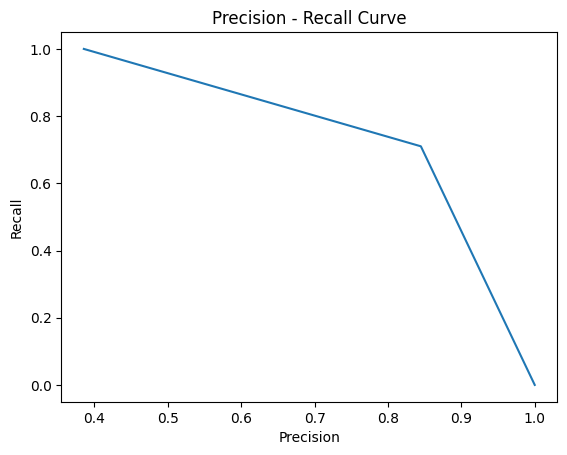

In [91]:
PR_Curve(y_test,search.predict(X_test))

ROC Area Under the curve equals: 0.8141633728590252


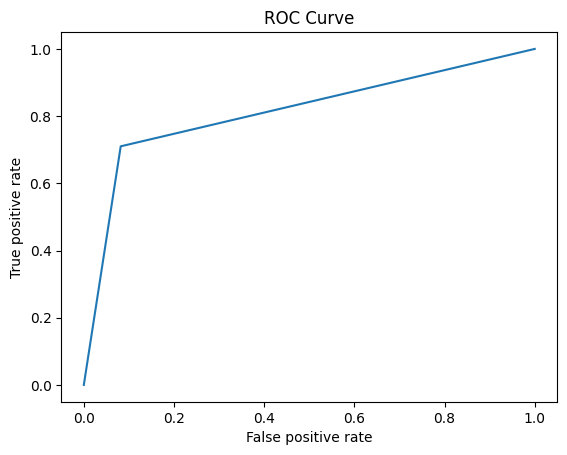

In [92]:
ROC_Curve(y_test,search.predict(X_test))

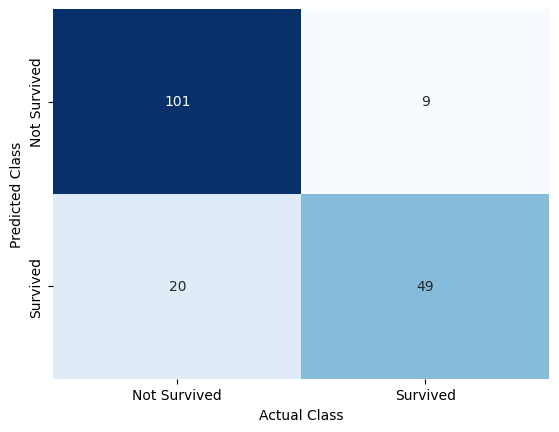

In [103]:
CMF = confusion_matrix(y_test,search.predict(X_test))
sns.heatmap(CMF,annot=True,cmap='Blues',fmt='.3g',xticklabels=['Not Survived','Survived'],yticklabels=['Not Survived','Survived'],cbar=False)
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.show()

1. Models' preformance is not bad but It could be better, I think that if we increase the number of features by either **collecting a real features about the passenger** that could affect their survival rate such as **Health condition or Race** or we could make new artificial features using **polynomial features**.
2. Also, Models' Preformance could be improved by many ways such as **Cross Validation, early stop or making the training set more balanced**.

# **6. Kaggle Competition test data** #

In [86]:
test_df.head(2)

,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,3,1,2,0,1,2,1
1,3,0,2,0,2,3,0


In [87]:
BestClassifier = RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=15,
                       n_estimators=150, random_state=24)
BestClassifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=15,
                       n_estimators=150, random_state=24)

In [107]:
test_df_raw = pd.read_csv('test.csv')
submission = pd.DataFrame({
        "PassengerId": test_df_raw["PassengerId"],
        "Survived": BestClassifier.predict(test_df)
    })
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [109]:
submission.to_csv('Submission.csv',index=False)